In [1]:
# Importing the modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Define data filepath
pathname = '/Users/Lumin/geospatial-data-science/labs/lab2/data/lab2'

# Read data
df = gpd.read_file(pathname + '/or_1992-2018.shp') # 'df' stands for DataFrame

In [48]:
df_small = df[df['FIRE_SIZE'] > 50]
df_large = df[df['FIRE_SIZE']> 100]
df_xllarge = df[df['FIRE_SIZE']>200]
df_small_human = df_small[df_small['NWCG_CAUSE'] == 'Human'].copy()
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Natural'].copy()
df_xllarge_unknown = df_xllarge[df_xllarge['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

In [47]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
# datetime

In [45]:
df_large_natural['datetime'] = datetime
df_large_natural_2016 = df_large_natural[df_large_natural['datetime'].dt.year == 2016]
# df_large_natural_2016

In [46]:
df_large_month = df_large.groupby(df_large_natural['datetime'].dt.month).count()
# df_large_month

In [43]:
#df_small_human['DISCOVERY_']

In [85]:
ld = df_xllarge.sort_values('FIRE_SIZE', ascending = False).copy()
largestfire = ld.iloc[0]
largestfire

OBJECTID                                          1578392.0
FOD_ID                                            201508655
FPA_ID                                             W-649635
SOURCE_SYS                                              FED
SOURCE_S_1                                         DOI-WFMI
NWCG_REPOR                                              BLM
NWCG_REP_1                                          USORVAD
NWCG_REP_2                                    Vale District
SOURCE_REP                                            ORVAD
SOURCE_R_1                                    Vale District
LOCAL_FIRE                                             None
LOCAL_INCI                                             None
FIRE_CODE                                              G1HG
FIRE_NAME                                         LONG DRAW
ICS_209_PL                     2012_OR-VAD-000067_LONG DRAW
ICS_209__1                                             None
MTBS_ID                               OR

In [52]:
df['FIPS_NAME'].describe()

count              45898
unique                45
top       Jackson County
freq                4284
Name: FIPS_NAME, dtype: object

In [55]:
df_xllarge_unknown['OBJECTID']

190      1909461.0
9755     2118753.0
9871     1359522.0
11524    2118725.0
13028    2118757.0
41888    2043068.0
45288    1359521.0
51464    1577997.0
56054    2118767.0
60018    1359053.0
60853    1065687.0
63516     366700.0
66793    1650247.0
Name: OBJECTID, dtype: float64

In [94]:
df_small_lane = df_small[df_small['COUNTY'] == 'Lane']
len(df_small_lane)

10

In [95]:
from cenpy import products
import matplotlib.pyplot as plt

In [97]:
# Define product
acs = products.ACS(2019)

In [ ]:
malheur_pop = products.ACS(2019).from_county('Malheur County, OR', level = 'tract',
                                              variables = ['B01003_001E'])

<AxesSubplot:>

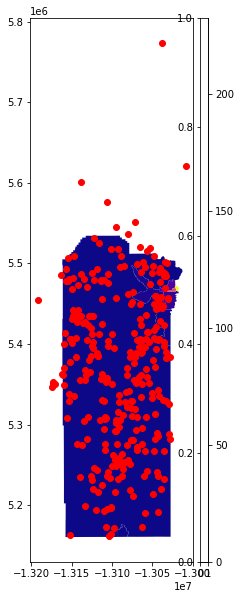

In [125]:
# f, ax = plt.subplots(1,1, figsize=(10,10))
# malhuer_pop.plot('B01003_001E', ax=ax, cmap = 'plasma')

malheur_pop['pop_density'] = malheur_pop['B01003_001E'] / (malheur_pop['geometry'].area / 1e+6)

from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax = plt.subplots(1, 1, figsize=(10,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

malheur_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)

df_tiny = df[df['FIRE_SIZE'] > 25]
malheur_fires = df_tiny[df_tiny['FIPS_NAME'] == 'Malheur County']
#malhuer_fires.crs

malheur_fire_project = malheur_fires.to_crs('EPSG:3857')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "5%", pad = 0.1)
malheur_fire_project.plot(ax=ax, c = 'red')

Lab2a
Question 1: 
a) Jackson County(?) or Malheur
b) July and August had the most fires over the total of all years
c) 66,793 Fires
d) Largest fire was in Malhuer County, 2012/07/08, and was called Long Draw
e) 10 Fires in lane county larger than 50 acres

Lab2b
a) The last cell of code shows Malheur County Oregon, with the population density. Overlayed on that is the locations of all fires greeater than 25 acres. I was curious to see if the fires were in any way focused around poppulation centers or if it was truly dispersed. Seems that it was entirely random at an initial glance.